input_shape= (227, 227, 3)

1. Convulated layers
2. Relu
3. Pooling Layer

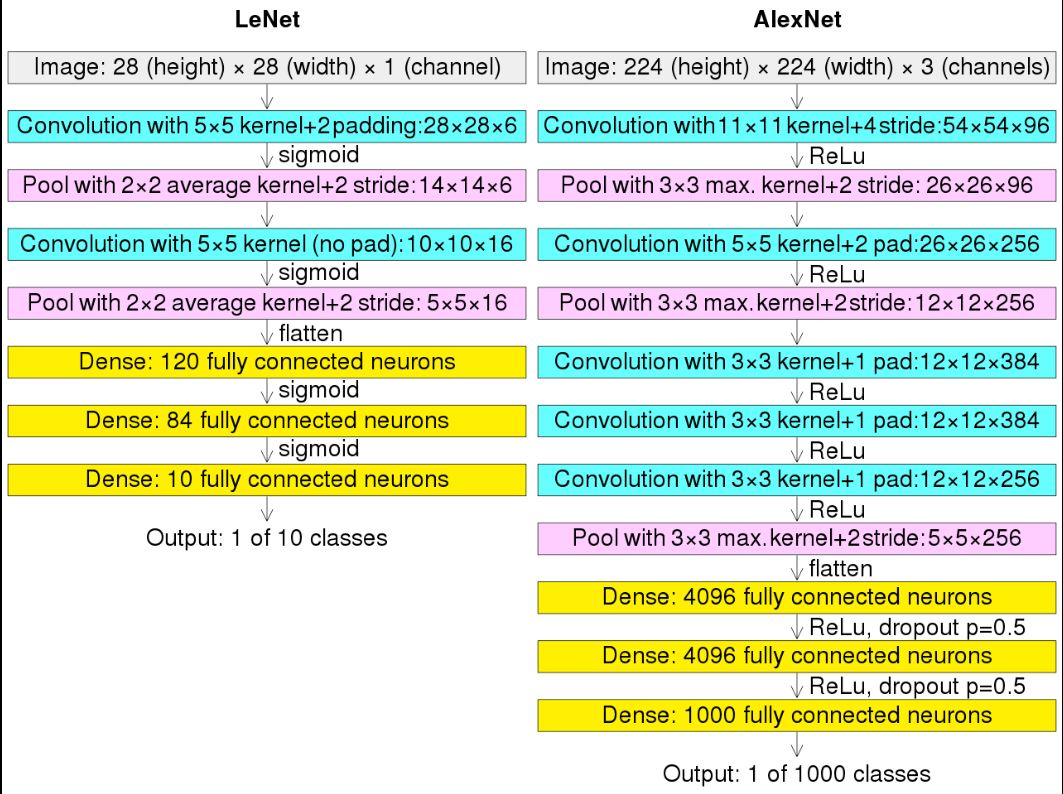

In [14]:
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [15]:
model = Sequential()

# Conv 01 Layer
model.add(Convolution2D(96, 11,padding = "valid",strides =(4, 4),input_shape = (224, 224, 3),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())



# Conv 02 Layer
model.add(Convolution2D(256, 5,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())


# Conv 03 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())


# Conv 04 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())



# Conv 05 Layer
model.add(Convolution2D(256, 3,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (3, 3),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())


# Flatten Layer
model.add(Flatten())


# Dense 01
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 02
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 03
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Final Layer
model.add(Dense(3, activation="softmax"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 384)        

In [17]:
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, decay = 0.005), 
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [18]:
datasets_directory = "../input/skin-lesion-analysis-toward-melanoma-detection/skin-lesions/"

In [19]:
batch_size = 128

In [20]:
train_dataGenerator = ImageDataGenerator(rescale = 1./255,
                                        shear_range = 0.2, 
                                        zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2, 
                                         fill_mode="nearest"
                                        )

validation_dataGenerator = ImageDataGenerator(rescale = 1./255)

In [21]:
# Load the datasets from the folder
trainDatasets = train_dataGenerator.flow_from_directory(datasets_directory+"/train", 
                                                       target_size=(224, 224),
                                                       batch_size=batch_size, 
                                                       class_mode="categorical")

validationDatasets = validation_dataGenerator.flow_from_directory(datasets_directory+"/valid", 
                                                       target_size=(224, 224),
                                                       batch_size=batch_size, 
                                                       class_mode="categorical")


Found 2000 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [22]:
classInformation = trainDatasets.class_indices
print("Class Information: {}".format(classInformation))
classes = list(classInformation)
print("Class Names: {}".format(classes))

Class Information: {'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2}
Class Names: ['melanoma', 'nevus', 'seborrheic_keratosis']


In [23]:
classSamplesT = trainDatasets.samples
print("Training Data Samples: {}".format(classSamplesT))
classSamplesV = validationDatasets.samples
print("Validation Data Samples: {}".format(classSamplesV))

Training Data Samples: 2000
Validation Data Samples: 150


In [24]:
weghtPath = "best_weights_9.hdf5"
checkPoint = ModelCheckpoint(weghtPath, monitor="val_acc", verbose = 1, save_best_only = True, save_weghts_only = True, mode = "max")
callBacksList = [checkPoint]

In [25]:
2000//128

15

In [26]:
history = model.fit(trainDatasets, 
                   steps_per_epoch = classSamplesT//batch_size, 
                   validation_data=validationDatasets, 
                   epochs=20, 
                   validation_steps=classSamplesV//batch_size, 
                   callbacks=callBacksList)

Epoch 1/20
15/15 [==============================] - 372s 25s/step - loss: 1.4753 - accuracy: 0.3691 - val_loss: 1.0710 - val_accuracy: 0.5234
Epoch 2/20
15/15 [==============================] - 335s 23s/step - loss: 1.3992 - accuracy: 0.3969 - val_loss: 1.0334 - val_accuracy: 0.5312
Epoch 3/20
15/15 [==============================] - 337s 22s/step - loss: 1.2700 - accuracy: 0.4530 - val_loss: 1.0178 - val_accuracy: 0.5469
Epoch 4/20
15/15 [==============================] - 332s 22s/step - loss: 1.2203 - accuracy: 0.4663 - val_loss: 1.0447 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 331s 22s/step - loss: 1.1401 - accuracy: 0.4882 - val_loss: 1.0368 - val_accuracy: 0.4844
Epoch 6/20
15/15 [==============================] - 337s 23s/step - loss: 1.1163 - accuracy: 0.5053 - val_loss: 1.0062 - val_accuracy: 0.5391
Epoch 7/20
15/15 [==============================] - 334s 22s/step - loss: 1.0836 - accuracy: 0.5299 - val_loss: 0.9980 - val_accuracy: 0.5234
Epoch 

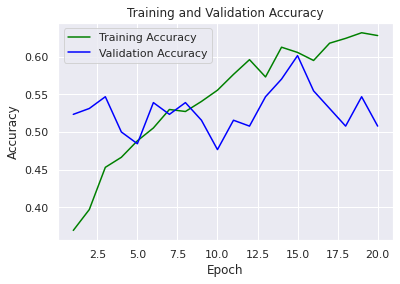

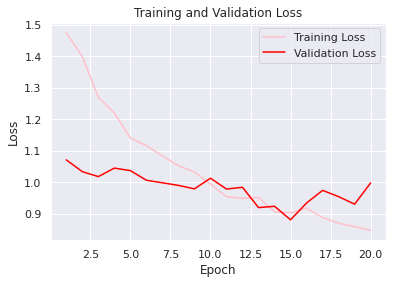

In [27]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:


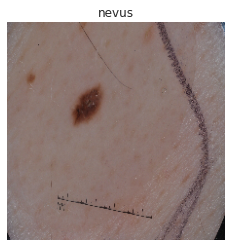

In [28]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-lesion-analysis-toward-melanoma-detection/skin-lesions/test/melanoma/ISIC_0012425.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = classes[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()